In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import math

In [10]:
DataFrame = pd.read_csv('updated_12_07.csv')
DataFrame

,State,County,Abbreviation,Max AQI,90th Percentile AQI,Median AQI,"Percent of adults with a high school diploma only, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",# Employed,# Unemployed,...,OtherGases,OtherNaturalGas,OtherWasteBiomass,PetroleumCoke,PetroleumLiquids,SolarPhotovoltaic,SolarThermalwithEnergyStorage,SolarThermalwithoutEnergyStorage,Wood/WoodWasteBiomass,Percent of people in poverty 2019
0,Alabama,Baldwin,AlabamaBaldwin,74,49,36,27.7,31.9,91338,5425,...,0,0,0,0,0,0,0,0,0,10.1
1,Alabama,Russell,AlabamaRussell,99,56,36,31.4,17.8,22290,1210,...,0,0,0,0,2,0,0,0,2,18.9
2,Alabama,Shelby,AlabamaShelby,71,46,28,19.8,42.9,109646,4402,...,0,0,0,0,17,4,0,0,0,6.2
3,Indiana,Shelby,IndianaShelby,115,46,32,42.4,18.7,21443,1643,...,0,0,0,0,17,4,0,0,0,10.1
4,Tennessee,Shelby,TennesseeShelby,152,61,44,27.5,31.6,404507,43262,...,0,0,0,0,17,4,0,0,0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Wyoming,Park,WyomingPark,113,30,11,25.8,34.0,14549,831,...,2,0,0,0,0,0,0,0,0,10.3
791,Wyoming,Platte,WyomingPlatte,283,50,19,38.3,20.7,4418,233,...,0,0,0,0,0,0,0,0,0,11.5
792,Wyoming,Sweetwater,WyomingSweetwater,1250,76,46,33.0,22.5,19308,1532,...,0,0,0,0,0,1,0,0,0,8.3
793,Wyoming,Teton,WyomingTeton,161,54,42,14.9,57.0,14292,912,...,0,0,0,0,3,0,0,0,0,6.0


,State,County,Abbreviation,Max AQI,90th Percentile AQI,Median AQI,"Percent of adults with a high school diploma only, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",# Employed,# Unemployed,...,OtherGases,OtherNaturalGas,OtherWasteBiomass,PetroleumCoke,PetroleumLiquids,SolarPhotovoltaic,SolarThermalwithEnergyStorage,SolarThermalwithoutEnergyStorage,Wood/WoodWasteBiomass,Percent of people in poverty 2019
0,Alabama,Baldwin,AlabamaBaldwin,74,49,36,27.7,31.9,91338,5425,...,0,0,0,0,0,0,0,0,0,10.1
1,Alabama,Russell,AlabamaRussell,99,56,36,31.4,17.8,22290,1210,...,0,0,0,0,2,0,0,0,2,18.9
2,Alabama,Shelby,AlabamaShelby,71,46,28,19.8,42.9,109646,4402,...,0,0,0,0,17,4,0,0,0,6.2
3,Indiana,Shelby,IndianaShelby,115,46,32,42.4,18.7,21443,1643,...,0,0,0,0,17,4,0,0,0,10.1
4,Tennessee,Shelby,TennesseeShelby,152,61,44,27.5,31.6,404507,43262,...,0,0,0,0,17,4,0,0,0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Wyoming,Park,WyomingPark,113,30,11,25.8,34.0,14549,831,...,2,0,0,0,0,0,0,0,0,10.3
791,Wyoming,Platte,WyomingPlatte,283,50,19,38.3,20.7,4418,233,...,0,0,0,0,0,0,0,0,0,11.5
792,Wyoming,Sweetwater,WyomingSweetwater,1250,76,46,33.0,22.5,19308,1532,...,0,0,0,0,0,1,0,0,0,8.3
793,Wyoming,Teton,WyomingTeton,161,54,42,14.9,57.0,14292,912,...,0,0,0,0,3,0,0,0,0,6.0


In [11]:
# Organizing the AQI 
AQI_Sort = DataFrame.sort_values(['90th Percentile AQI']) # Sorts the AQI according towards Median AQI 
AQI_Sort = AQI_Sort.reset_index(drop=True)
AQI_Sort

,State,County,Abbreviation,Max AQI,90th Percentile AQI,Median AQI,"Percent of adults with a high school diploma only, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",# Employed,# Unemployed,...,OtherGases,OtherNaturalGas,OtherWasteBiomass,PetroleumCoke,PetroleumLiquids,SolarPhotovoltaic,SolarThermalwithEnergyStorage,SolarThermalwithoutEnergyStorage,Wood/WoodWasteBiomass,Percent of people in poverty 2019
0,South Carolina,Oconee,South CarolinaOconee,0,0,0,29.0,25.8,33180,1876,...,0,0,0,0,6,0,0,0,0,13.1
1,Texas,Freestone,TexasFreestone,10,1,0,33.2,15.3,5820,528,...,0,0,0,0,0,0,0,0,0,15.5
2,Texas,Robertson,TexasRobertson,29,1,0,35.5,16.1,6875,470,...,0,0,0,0,0,0,0,0,0,20.7
3,Maryland,Allegany,MarylandAllegany,9,3,1,41.8,18.9,28437,2398,...,0,0,0,0,0,1,0,0,0,16.0
4,Indiana,Daviess,IndianaDaviess,19,4,0,34.0,13.2,15891,632,...,0,0,0,0,4,1,0,0,0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,California,Plumas,CaliforniaPlumas,469,146,49,26.1,23.7,6753,806,...,0,0,0,0,0,0,0,0,1,13.2
791,California,Fresno,CaliforniaFresno,298,153,74,22.7,21.2,395258,50260,...,0,0,0,0,3,56,0,0,2,20.5
792,California,Riverside,CaliforniaRiverside,576,159,87,26.9,22.3,997725,109998,...,0,0,1,0,0,77,0,2,1,11.3
793,California,Mono,CaliforniaMono,1928,199,40,24.2,28.8,6917,929,...,0,0,0,0,0,0,0,0,0,10.1


,State,County,Abbreviation,Max AQI,90th Percentile AQI,Median AQI,"Percent of adults with a high school diploma only, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",# Employed,# Unemployed,...,OtherGases,OtherNaturalGas,OtherWasteBiomass,PetroleumCoke,PetroleumLiquids,SolarPhotovoltaic,SolarThermalwithEnergyStorage,SolarThermalwithoutEnergyStorage,Wood/WoodWasteBiomass,Percent of people in poverty 2019
0,South Carolina,Oconee,South CarolinaOconee,0,0,0,29.0,25.8,33180,1876,...,0,0,0,0,6,0,0,0,0,13.1
1,Texas,Freestone,TexasFreestone,10,1,0,33.2,15.3,5820,528,...,0,0,0,0,0,0,0,0,0,15.5
2,Texas,Robertson,TexasRobertson,29,1,0,35.5,16.1,6875,470,...,0,0,0,0,0,0,0,0,0,20.7
3,Maryland,Allegany,MarylandAllegany,9,3,1,41.8,18.9,28437,2398,...,0,0,0,0,0,1,0,0,0,16.0
4,Indiana,Daviess,IndianaDaviess,19,4,0,34.0,13.2,15891,632,...,0,0,0,0,4,1,0,0,0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,California,Plumas,CaliforniaPlumas,469,146,49,26.1,23.7,6753,806,...,0,0,0,0,0,0,0,0,1,13.2
791,California,Fresno,CaliforniaFresno,298,153,74,22.7,21.2,395258,50260,...,0,0,0,0,3,56,0,0,2,20.5
792,California,Riverside,CaliforniaRiverside,576,159,87,26.9,22.3,997725,109998,...,0,0,1,0,0,77,0,2,1,11.3
793,California,Mono,CaliforniaMono,1928,199,40,24.2,28.8,6917,929,...,0,0,0,0,0,0,0,0,0,10.1


In [12]:
# Separating the 90th Percentile AQI into Good,Moderate, Unhealthy Air Quality According to EPA Standards
DataFrame.loc[DataFrame['90th Percentile AQI'] <= 50, 'Quality'] = 'Good'
DataFrame.loc[(DataFrame['90th Percentile AQI'] >= 51) & (DataFrame['90th Percentile AQI'] <= 100), 'Quality'] = 'Moderate'
DataFrame.loc[DataFrame['90th Percentile AQI'] >=101, 'Quality'] = 'Unhealthy'
air_data = DataFrame['Quality'].value_counts().to_frame('Counts')

DataFrame.to_csv('update.csv') # double check the .CSV

Good = DataFrame[DataFrame['Quality'].str.contains('Good')]
Moderate = DataFrame[DataFrame['Quality'].str.contains('Moderate')]
Unhealthy = DataFrame[DataFrame['Quality'].str.contains('Unhealthy')]
air_data

,Counts
Moderate,397
Good,381
Unhealthy,17


,Counts
Moderate,397
Good,381
Unhealthy,17


In [13]:
# LASSO - no classes
# Forest - with and without classes
# Logistic - with classes
# Visualizing the AQI Data 
# plotting to log scale for population 
# tell the story of AQI means per county 
# take parts
pop_log_good = np.log10(Good['Population (2014-2020)'])
pop_log_mod = np.log10(Moderate['Population (2014-2020)'])
pop_log_unhealthy = np.log10(Unhealthy['Population (2014-2020)'])

fig=go.Figure()

fig.add_trace(go.Scatter(y = Good['Quality'],
                                x = pop_log_good,
                                mode='markers',
                                name= 'Good AQI'))
                                

fig.add_trace(go.Scatter(y = Moderate['Quality'],
                                x = pop_log_mod,
                                mode='markers',
                                name= 'Moderate AQI'))
                                
              
fig.add_trace(go.Scatter(y = Unhealthy['Quality'],
                                x = pop_log_unhealthy,
                                mode='markers',
                                name= 'Unhealthy AQI'))
                                
fig.update_layout(
    title="AQI Vs. Population",
    xaxis_title="Population",
    yaxis_title="AQI Quality")


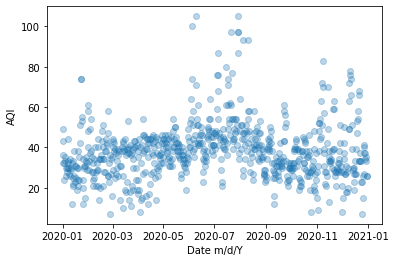

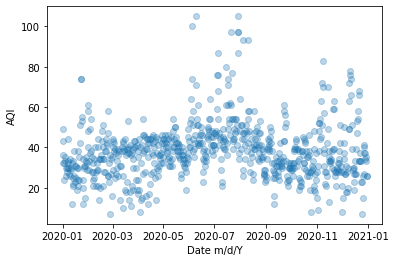

In [14]:
#from datetime import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates

DailyAQI = pd.read_csv('daily_aqi_by_county_2020.csv')
MarylandAQI = DailyAQI[DailyAQI['State Name'].str.contains('Maryland')]
MarylandAQI
BaltimoreAQI = MarylandAQI[MarylandAQI['county Name'].str.contains('Baltimore')]
BaltimoreDate = BaltimoreAQI['Date'].to_list()

fig,ax = plt.subplots(1,1)
x_values = [datetime.strptime(d,"%m/%d/%Y").date() for d in BaltimoreDate]
y_values = BaltimoreAQI['AQI']

# testing for specific dates 
#ax = plt.gca()
#startDate = "12/11/2020"
#stopDate =  "12/30/2020"
#start = datetime.strptime(startDate,"%m/%d/%Y").date()
#end =  datetime.strptime(stopDate,"%m/%d/%Y").date()
#ax.set_xlim(start, end)

ax.set_ylabel('AQI') 
ax.set_xlabel('Date m/d/Y')
plt.scatter(x_values, y_values,alpha = 0.3)

In [15]:
MarylandDf = DataFrame[DataFrame['State'].str.contains('Maryland')]
MarylandDf
pop_log_Maryland = np.log10(MarylandDf['Population (2014-2020)'])

fig=go.Figure()

fig.add_trace(go.Scatter(y = MarylandDf['90th Percentile AQI'],
                                x = pop_log_Maryland,
                                mode='markers',
                                hovertemplate = '%{text}<extra></extra>',
                                text = MarylandDf['County']))
fig.update_layout(
    title="AQI Vs. Population",
    xaxis_title="Population (2014-2020) in Maryland Counties on a Log Scale",
    yaxis_title="AQI Quality")


In [20]:
# Remove string columns for Regression Analysis to work 
# Regressions 
# Based on 90th Percentile AQI 
NewData = DataFrame.drop(columns = ["State","County","Abbreviation","Quality","Unnamed: 0","Max AQI","Median AQI"])
PropertyList = NewData.columns
AirProps = (NewData[PropertyList] - NewData[PropertyList].mean())/NewData[PropertyList].std()
AirProps.describe()
# For Seperate Classes 
NewGood = Good.drop(columns = ["State","County","Abbreviation","Quality",'Unnamed: 0'])
NewModerate = Moderate.drop(columns = ["State","County","Abbreviation","Quality",'Unnamed: 0']) 
NewUnhealthy = Unhealthy.drop(columns = ["State","County","Abbreviation","Quality",'Unnamed: 0'])
NewModerate

KeyError: "['Unnamed: 0'] not found in axis"

KeyError: "['Unnamed: 0'] not found in axis"

In [18]:
# CODE FOR LINEAR REGRESSION

AirProps = (NewData[PropertyList] - NewData[PropertyList].mean())/NewData[PropertyList].std()
AirProps.describe()

X_train, X_test, y_train, y_test = train_test_split(AirProps.drop(columns=['90th Percentile AQI']),
                                                    AirProps['90th Percentile AQI'], test_size=0.30, random_state=0)
# Create linear regression object
regr = LinearRegression()

# Fit the model
regr.fit(X_train,y_train)

pred_train = regr.predict(X_train) 
pred_test = regr.predict(X_test)

MSExTrain= mean_squared_error(y_train,pred_train)*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean()
RMSExTrain=np.power(MSExTrain,0.5)

MSExTest= mean_squared_error(y_test,pred_test)*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean()
RMSExTest= np.power(MSExTest,0.5)


# The root mean squared error
print('Training root mean squared error: %.2f'
      % RMSExTrain)
print('Test root mean squared error: %.2f'
      % RMSExTest)

x1 = y_train*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean(),
y1 = pred_train*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean()

x2 = y_test*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean(),
y2 = pred_test*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean()

fig,ax=plt.subplots()
ax.scatter(x1,y1,alpha=0.1)
ax.scatter(x2,y2,alpha=0.1)
ax.plot(np.linspace(1,200,10),np.linspace(1,200,10),'k-') # y = x line
ax.set_xlabel('Measured Quality')
ax.set_ylabel('Predicted Quality')
ax.legend(['y=x line','Training set','Test set'])
fig.show

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
# CODE FOR LASSO REGRESSION on the entire dataset 
AirProps = (NewData[PropertyList] - NewData[PropertyList].mean())/NewData[PropertyList].std()
AirProps.describe()

X_train, X_test, y_train, y_test = train_test_split(AirProps.drop(columns=['90th Percentile AQI']),
                                                    AirProps['90th Percentile AQI'], test_size=0.30, random_state=0)
regr = Lasso(alpha=0.01)
regr.fit(X_train,y_train)
pred_train = regr.predict(X_train) 
pred_test = regr.predict(X_test)

AirCoef = regr.coef_

MSExTrain= mean_squared_error(y_train,pred_train)*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean()
RMSExTrain=np.power(MSExTrain,0.2)

MSExTest= mean_squared_error(y_test,pred_test)*NewData['90th Percentile AQI'].std()+NewData['90th Percentile AQI'].mean()
RMSExTest= np.power(MSExTest,0.2)


# The root mean squared error
print('Training root mean squared error for 90th Percentile AQI: %.2f'
      % RMSExTrain)
print('Test root mean squared error for 90th Percentile AQI: %.2f'
      % RMSExTest)
AQI_important = []
for i in range(len(AirCoef)):
    if AirCoef[i] != 0:
        AQI_important.append(i)

fig,ax = plt.subplots(1,1)
ax.plot([-3, 10],[-3,10])
ax.scatter(y_train,pred_train,alpha=0.1)
ax.scatter(y_test,pred_test,alpha=0.1)
# depends on the alpha value
ax.legend(['y=x Line','Training','Test'])
ax.set_xlabel('Experimental')
ax.set_ylabel('Predicted')


list1 = PropertyList[AQI_important]
list2 = AQI_important
important_features = pd.DataFrame(list(zip(list1, list2)), columns = ['Feature', 'Importance'])
ordered_importance = (important_features.sort_values(by='Importance', ascending=False))
display(ordered_importance.head())
display(ordered_importance)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').